In [1]:
import os
%pwd  # this tell us which path we are currently working , so based on the below output path we are working under the research file
os.chdir("../")  #  but i would like to work with main ProjectML_with_MLFlow file , so for getting i step back in path inorder to enter the main project file i used this command os.chdir("../")
%pwd

'c:\\datascience End to End Projects\\TV sales prediciton\\TV-sales-prediction'

In [2]:
import pandas as pd
data=pd.read_csv("C:\\Users\\mahen\\Downloads\\advertising.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
data.shape

(200, 4)

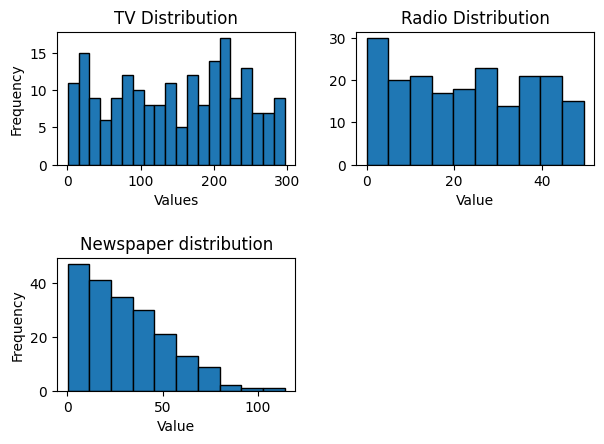

In [5]:
import matplotlib.pyplot as plt
plt.subplot(2, 2, 1)
plt.hist(x='TV',data=data,bins=20, edgecolor='black')
plt.title('TV Distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(x='Radio',data=data, edgecolor='black')
plt.title('Radio Distribution')
plt.xlabel('Value')

plt.subplot(2, 2, 3)
plt.hist(x='Newspaper',data=data,edgecolor='black')
plt.title('Newspaper distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout(pad=2.0)



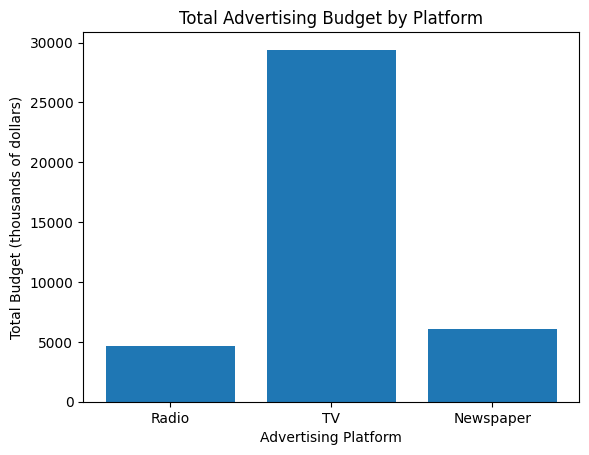

In [6]:
x=data['Radio'].sum()
y=data['TV'].sum()
z=data['Newspaper'].sum()

plt.bar(['Radio','TV','Newspaper'],[x,y,z])
plt.xlabel('Advertising Platform')
plt.ylabel('Total Budget (thousands of dollars)')
plt.title('Total Advertising Budget by Platform')

# Display the plot
plt.show()


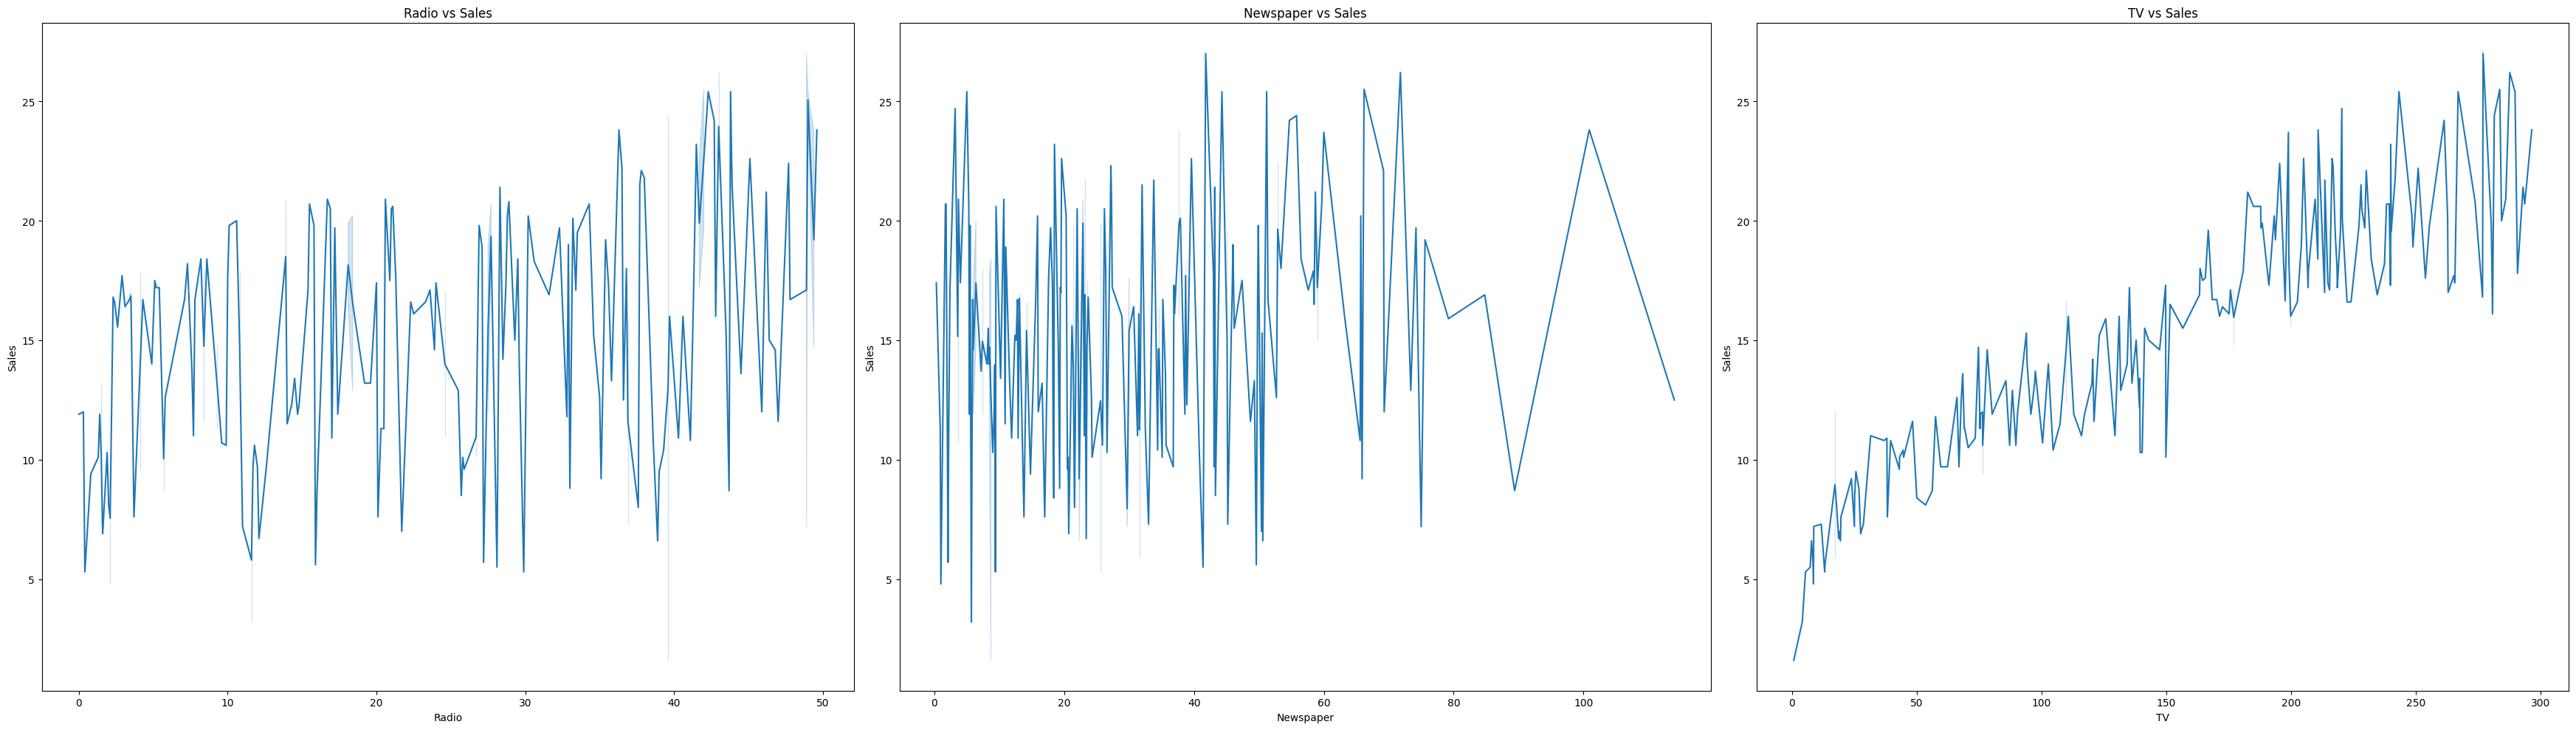

In [7]:
import seaborn as sns
# Create a figure with subplots
plt.figure(figsize=(35, 10))

# Plot 1: Radio vs Sales
plt.subplot(1, 3, 1)
sns.lineplot(x='Radio', y='Sales', data=data)
plt.title('Radio vs Sales')

# Plot 2: Newspaper vs Sales
plt.subplot(1, 3, 2)
sns.lineplot(x='Newspaper', y='Sales', data=data)
plt.title('Newspaper vs Sales')

# Plot 3: TV vs Sales
plt.subplot(1, 3, 3)
sns.lineplot(x='TV', y='Sales', data=data)
plt.title('TV vs Sales')

# Adjust layout and show plots
plt.tight_layout()
plt.show()


In [8]:
#Handling the missing values 
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

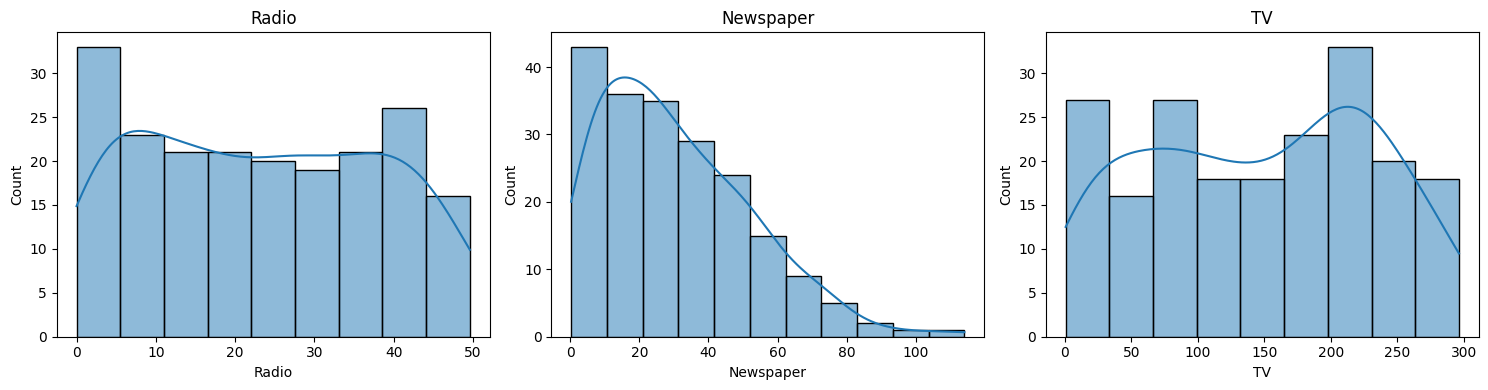

In [9]:

# Create a figure with subplots
plt.figure(figsize=(15, 4))

# Histogram and KDE plot 1: Radio
plt.subplot(1, 3, 1)
sns.histplot(data['Radio'], kde=True)
plt.title('Radio')

# Histogram and KDE plot 2: Newspaper
plt.subplot(1, 3, 2)
sns.histplot(data['Newspaper'], kde=True)
plt.title('Newspaper')

# Histogram and KDE plot 3: TV
plt.subplot(1, 3, 3)
sns.histplot(data['TV'], kde=True)
plt.title('TV')

# Adjust layout and show plots
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Regression Plot: TV vs Sales')

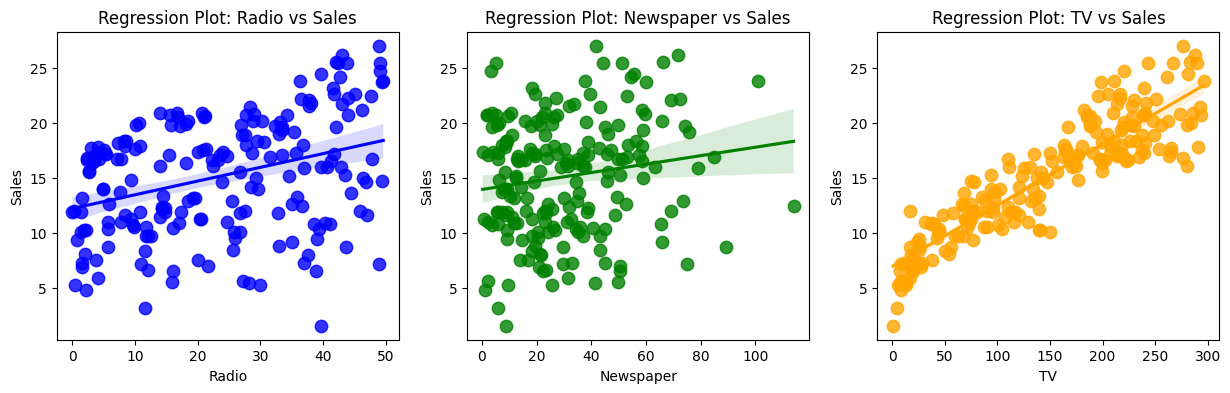

In [10]:
# Create a figure with subplots
plt.figure(figsize=(15, 4))

# Regression plot 1: Radio vs Sales
plt.subplot(1, 3, 1)
sns.regplot(x='Radio', y='Sales', data=data, scatter_kws={'s': 80}, color='blue')
plt.title('Regression Plot: Radio vs Sales')

# Regression plot 2: Newspaper vs Sales
plt.subplot(1, 3, 2)
sns.regplot(x='Newspaper', y='Sales', data=data, scatter_kws={'s': 80}, color='green')
plt.title('Regression Plot: Newspaper vs Sales')

# Regression plot 3: TV vs Sales
plt.subplot(1, 3, 3)
sns.regplot(x='TV', y='Sales', data=data, scatter_kws={'s': 80}, color='orange')
plt.title('Regression Plot: TV vs Sales')


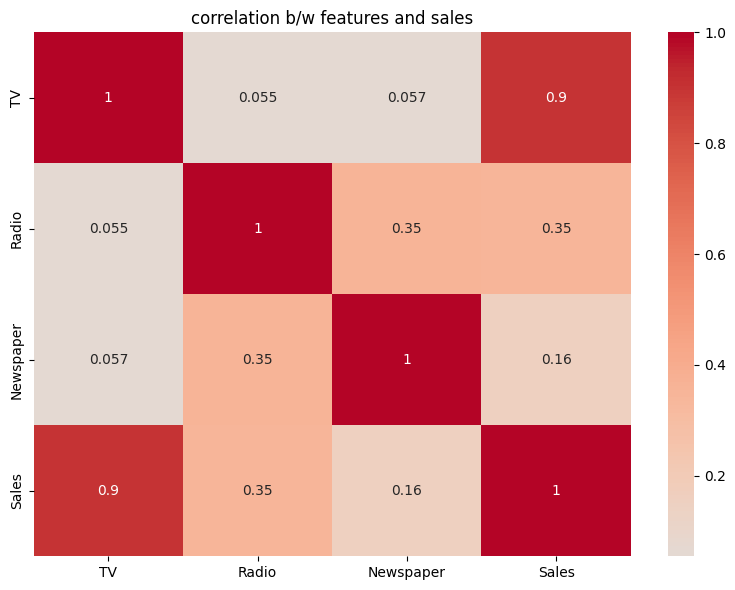

In [11]:
correlation_matrix=data.corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',center=0)
plt.title('correlation b/w features and sales')
plt.tight_layout()

In [19]:
# lets prepare the entity here , and if i open the config.yaml file where i can find the root_dir,status_file,unzip_data the same i do find in the class iside the DataValiadationConfig
from dataclasses import dataclass
from pathlib import Path

@dataclass(frozen=True)
class DataValidationConfig:
    root_dir: Path
    STATUS_FILE: str
    unzip_data_dir: Path
    all_schema: dict # here all_Schema just read all the data and install inside the all_schema varaible as a dictionary formate

In [20]:
# in order to prepare my cofiguration manager in src config i need this below 2 packages 
from TV_sales.constants import *
from TV_sales.utils.common import read_yaml, create_directories

In [21]:
class ConfigurationManager:
    def __init__(
        self,
        config_filepath = CONFIG_FILE_PATH,
        params_filepath = PARAMS_FILE_PATH,
        schema_filepath = SCHEMA_FILE_PATH):

        self.config = read_yaml(config_filepath) # here iam reading these all like config,params,schema 
        self.params = read_yaml(params_filepath)
        self.schema = read_yaml(schema_filepath)

        create_directories([self.config.artifacts_root])

# then i will prepare my get_data_validation_config , so inside this iam returning all of the varaibles that i have deifined inside my entity 
    
    def get_data_validation_config(self) -> DataValidationConfig:
        config = self.config.data_validation  # after reading by config iam returning the root_dir,status_file etc one by one
        schema = self.schema.COLUMNS

        create_directories([config.root_dir])

        data_validation_config = DataValidationConfig( # the above entity code is return type , and the below varaibles are getting return after reading by config varaible 
            root_dir=config.root_dir, 
            STATUS_FILE=config.STATUS_FILE,
            unzip_data_dir = config.unzip_data_dir,
            all_schema=schema,
        )

        return data_validation_config

In [22]:
class DataValiadtion: # this is components name 
    def __init__(self, config: DataValidationConfig): # it will take my DataValidationConfig
        self.config = config


    def validate_all_columns(self) -> bool:
        try:
            data = pd.read_csv(self.config.unzip_data_dir)
            all_cols = list(data.columns)
            all_schema = self.config.all_schema.keys()

            # Check if all columns in the schema are present in the dataset
            validation_status = all(col in all_cols for col in all_schema)

            # Write the validation status to the status file
            with open(self.config.STATUS_FILE, 'w') as f:
                f.write(f"Validation status: {validation_status}")

            return validation_status

        except Exception as e:
            raise e


In [23]:
try:
    config = ConfigurationManager() # here iam initializing my configuration manager
    data_validation_config = config.get_data_validation_config() # here iam getting my get_data_validation_config
    data_validation = DataValiadtion(config=data_validation_config) # then iam calling my DataValidation class and passing data_validation_config inside it
    data_validation.validate_all_columns()
except Exception as e:
    raise e

[2024-02-03 13:22:59,331: INFO: common: yaml file: config\config.yaml loaded successfully]
[2024-02-03 13:22:59,360: INFO: common: yaml file: params.yaml loaded successfully]
[2024-02-03 13:22:59,364: INFO: common: yaml file: schema.yaml loaded successfully]
[2024-02-03 13:22:59,367: INFO: common: created directory at: artifacts]
[2024-02-03 13:22:59,371: INFO: common: created directory at: artifacts/data_validation]
